# Determining absolute hydration free energy offsets

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Global-variables" data-toc-modified-id="Global-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global variables</a></span></li><li><span><a href="#Feature-generation" data-toc-modified-id="Feature-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature generation</a></span><ul class="toc-item"><li><span><a href="#Descriptors" data-toc-modified-id="Descriptors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptors</a></span></li><li><span><a href="#Fingerprints" data-toc-modified-id="Fingerprints-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fingerprints</a></span></li><li><span><a href="#Compile-features" data-toc-modified-id="Compile-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compile features</a></span></li><li><span><a href="#Remove-columns-with-string-values" data-toc-modified-id="Remove-columns-with-string-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Remove columns with string values</a></span></li><li><span><a href="#Convert-all-values-to-float" data-toc-modified-id="Convert-all-values-to-float-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Convert all values to float</a></span></li><li><span><a href="#Normalise-data" data-toc-modified-id="Normalise-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Normalise data</a></span></li><li><span><a href="#Perform-PCA-on-features-alone" data-toc-modified-id="Perform-PCA-on-features-alone-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Perform PCA on features alone</a></span></li><li><span><a href="#Recover-top-PCs" data-toc-modified-id="Recover-top-PCs-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Recover top PCs</a></span></li></ul></li><li><span><a href="#Label-generation" data-toc-modified-id="Label-generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Label generation</a></span></li><li><span><a href="#Training-and-testing-set-generation" data-toc-modified-id="Training-and-testing-set-generation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training and testing set generation</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Training-set" data-toc-modified-id="Training-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Training set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li><li><span><a href="#Testing-set" data-toc-modified-id="Testing-set-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Testing set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Perform-5-fold-cross-validation" data-toc-modified-id="Perform-5-fold-cross-validation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Perform 5-fold cross-validation</a></span></li><li><span><a href="#Start-log-file" data-toc-modified-id="Start-log-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Start log file</a></span></li><li><span><a href="#Define-SVR" data-toc-modified-id="Define-SVR-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Define SVR</a></span></li><li><span><a href="#Train-SVR" data-toc-modified-id="Train-SVR-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Train SVR</a></span></li><li><span><a href="#Write-SVR-statistic-outputs" data-toc-modified-id="Write-SVR-statistic-outputs-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Write SVR statistic outputs</a></span></li><li><span><a href="#Plot-convergence" data-toc-modified-id="Plot-convergence-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Plot convergence</a></span></li></ul></li><li><span><a href="#External-testing" data-toc-modified-id="External-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>External testing</a></span><ul class="toc-item"><li><span><a href="#Per-SVR-model" data-toc-modified-id="Per-SVR-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Per SVR model</a></span></li><li><span><a href="#Averaged-over-all-models" data-toc-modified-id="Averaged-over-all-models-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Averaged over all models</a></span></li></ul></li><li><span><a href="#Corrected-hydration-free-energies" data-toc-modified-id="Corrected-hydration-free-energies-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Corrected hydration free energies</a></span></li><li><span><a href="#Determining-high-absolute-errors" data-toc-modified-id="Determining-high-absolute-errors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Determining high absolute errors</a></span><ul class="toc-item"><li><span><a href="#Absolute-error-<-1.00" data-toc-modified-id="Absolute-error-<-1.00-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Absolute error &lt; 1.00</a></span></li><li><span><a href="#1.00-<-absolute-error-<-2.00" data-toc-modified-id="1.00-<-absolute-error-<-2.00-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>1.00 &lt; absolute error &lt; 2.00</a></span></li><li><span><a href="#Absolute-error->-2.00" data-toc-modified-id="Absolute-error->-2.00-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Absolute error &gt; 2.00</a></span></li></ul></li></ul></div>

## Imports

In [1]:
# General:
import pandas as pd
import numpy as np
import os
import csv
import subprocess
import time
import shutil
import glob
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import statistics
import pickle

# SciKit-Optimise:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.utils import use_named_args

# SVM:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdmolfiles, rdMolDescriptors
from rdkit.Chem import SDMolSupplier, Descriptors, Crippen, Lipinski, Fragments

# Misc.:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from scipy import stats
import statistics
import pickle
from mordred import Calculator, descriptors

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Global variables

In [2]:
absolute_dGoffset_path = './absolute_dGoffset/'

# dataset_path = '~/Dropbox/FreeSolv/dGlearn-FreeSolv-master/datasets/train_compiled/dGhydr_train.csv'
offset_col_name = 'dGoffset (kcal/mol)'

# set data processing configurations:
PCA_threshold = 0.95  # Keeps n dimensions for x variance explained
replicates = 30  # Number of replicates per subject model
n_calls = 40  # Number of Bayesian optimisation loops for hyperparameter optimisation, 40 is best for convergence, > 60 scales to very expensive
startpoint_BO = np.inf  # Point to consider top-performing model from (MAE/MAD); 1.0 = no improvement on test-set variance
ensemble_size = 10  # Amount of top-scoring models to retain per fold-dataset combination
# KFold parameters:
n_splits = 5  # Number of K-fold splits
random_state = 2  # Random number seed

split = 'dG(hydr)'
translated_subject = 'absolute'

In [3]:
def plot_scatter(dataframe, x_info, y_info):
    """x and y are lists with fomrat [index, axis label]."""
    
    # x and y data
    x = dataframe.iloc[:, x_info[0]]
    y = dataframe.iloc[:, y_info[0]]
    
    # plot scatter
    plt.scatter(x, y, 
                color='black', 
                s=8)
    
    # plot line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    plt.plot(np.unique(x), 
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
             color='black', 
             linewidth=1)
    
    # axis labels
    plt.xlabel(x_info[1])
    plt.ylabel(y_info[1])
    
    # R-squared
    r2 = r2_score(x, y)
    
    # MAE
    MAE = mean_squared_error(x, y)
    
    # annotate with r-squared and MAE
    string = """R-squared = {}\nMAE = {}""".format(round(r2, 4), round(MAE, 4))
    plt.annotate(string, 
                 xy=(0, 1), 
                 xytext=(12, -12), 
                 va='top', 
                 xycoords='axes fraction', 
                 textcoords='offset points')

## Feature generation
### Descriptors
- Open user-specified descriptors and create list.
- Consult http://mordred-descriptor.github.io/documentation/master/descriptors.html.
- All descriptors have been used.

In [4]:
descriptors_raw = open(absolute_dGoffset_path + 'features_X/mordred_descriptors/all_descriptors.txt', 'r')
descriptors_raw_list = [line.split('\n') for line in descriptors_raw.readlines()]
descriptors_list = [desc[0] for desc in descriptors_raw_list]

print('Number of descriptors:', str(len(descriptors_list)))

Number of descriptors: 1825


- Load in all FreeSolve SDF files.
- Calculate all descriptors.

In [5]:
# set up feature calculator
print("Generating features...")
calc = Calculator(descriptors, ignore_3D=False)

# Supply SDF
SDF_dr = './datasets/sdffiles/'
suppl = [sdf for sdf in glob.glob(SDF_dr + '*.sdf')]

# Empty DataFrame containing only descriptor names as headings
mordred_df = pd.DataFrame(columns=descriptors_list)

ID_lst = []

for mol in suppl:
    ID = mol.strip(SDF_dr)
    ID_lst.append(ID)
    feat = calc.pandas(Chem.SDMolSupplier(mol))
    mordred_df = mordred_df.append(feat, ignore_index=True, sort=False)

Generating features...


100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


In [6]:
# Insert IDs as new column with column index = 0
mordred_df.insert(0, 'ID', ID_lst)
mordred_df

mordred_save_loc = absolute_dGoffset_path + 'features_X/mordred_descriptor_output/mordred_descriptors.csv'

if os.path.exists(mordred_save_loc):
    os.remove(mordred_save_loc)
    mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)
    print('Existing file overwritten.')
else:
    mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)

print('Completed writing all calculated mordred descriptors to CSV.')

Existing file overwritten.
Completed writing all calculated mordred descriptors to CSV.


### Fingerprints

In [7]:
FP_table = []

for sdf in glob.glob(SDF_dr + '*.sdf'):
    
    FP_row = []
    
    # Append ligand ID
    FP_row.append(sdf.strip(SDF_dr).strip('*.sdf'))
    
    # Setup fingerprint
    mol = Chem.rdmolfiles.SDMolSupplier(sdf)[0]
    mol.UpdatePropertyCache(strict=False)
    
    # Calculate fingerprint
    FP = rdMolDescriptors.GetHashedAtomPairFingerprint(mol, 256)
    for x in list(FP):
        FP_row.append(x)
    
    FP_table.append(FP_row)

# Column names
ID_col = ['ID']
FP_col = np.arange(0, 256).tolist()
FP_col = [ID_col.append("pfp" + str(item)) for item in FP_col]

FP_df = pd.DataFrame(FP_table, columns=ID_col)
FP_df

# Save to CSV
FP_save_loc = absolute_dGoffset_path + 'features_X/fingerprints_output/fingerprints.csv'

if os.path.exists(FP_save_loc):
    os.remove(FP_save_loc)
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)
    print('Existing file overwritten.')
else:
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)

print('Completed writing all calculated fingerprints to CSV.')

Existing file overwritten.
Completed writing all calculated fingerprints to CSV.


### Compile features

In [8]:
compiled_X_df = mordred_df
compiled_X_df = compiled_X_df.join(FP_df.set_index('ID'), on='ID')
# compiled_df = compiled_df.set_index('ID')
compiled_X_df

,ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
0,mobley_5852491,4.352030,4.429961,0,0,7.465883,2.114908,3.975713,7.465883,1.244314,...,0,0,0,0,0,0,0,0,0,0
1,mobley_9838013,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,...,0,0,0,0,0,0,0,0,0,0
2,mobley_2410897,1.414214,1.414214,0,1,2.828427,1.414214,2.828427,2.828427,0.942809,...,0,0,0,0,0,0,0,0,0,1
3,mobley_1893815,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,...,0,0,0,0,0,0,0,0,0,0
4,mobley_2008055,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,mobley_4149784,12.865821,9.994335,0,0,21.056081,2.438426,4.876853,21.056081,1.316005,...,2,0,0,0,0,0,0,0,6,4
638,mobley_6497672,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,...,0,0,0,0,0,0,0,0,0,0
639,mobley_9534740,8.761080,8.651650,0,0,14.708146,2.377683,4.755367,14.708146,1.225679,...,0,0,4,4,0,2,0,1,0,0
640,mobley_3980099,6.611250,6.419894,0,0,10.891331,2.263821,4.527642,10.891331,1.210148,...,0,0,0,0,0,0,0,0,3,2


In [9]:
# Save to 
if not os.path.isdir(absolute_dGoffset_path + 'features_X/tmp/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/tmp/')
tmp_compiled_X = absolute_dGoffset_path + 'features_X/tmp/compiled_data.csv'

if os.path.exists(tmp_compiled_X):
    os.remove(tmp_compiled_X)
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)
    print('Existing file overwritten.')
else:
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)

print('Completed writing temporary compiled features to CSV.')

Existing file overwritten.
Completed writing temporary compiled features to CSV.


### Remove columns with string values

In [10]:
def check_dataframe_is_numeric(dataframe):
    """Iterate over all columns and check if numeric.

    Returns:
    New DataFrame with removed"""

    columns_dropped = 0
    columns_dropped_lst = []

    for col in dataframe.columns:
        for index, x in zip(dataframe.index, dataframe.loc[:, col]):
            try:
                float(x)
            except ValueError:
                columns_dropped_lst.append([col, index, x])
                columns_dropped += 1
                dataframe = dataframe.drop(columns=col)
                break

    print('Number of columns dropped:', (columns_dropped))
    return dataframe, columns_dropped_lst


tmp_compiled_df = pd.read_csv(tmp_compiled_X, index_col='ID')
numeric_X, columns_dropped = check_dataframe_is_numeric(tmp_compiled_df)
numeric_X

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,126,127,128,129,130,131,132,133,134,225,226,227,333,334,335,336,337,338,339,340,341,441,442,443,522,523,538,539,618,619,634,635,664,665,679,692,705,718,731,744,757,770,833,859,867,868,875,883,884,932,1275,1276,1277,1278,1299,1300,1349,1765,1793,1794,1796,1824) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of columns dropped: 712


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_5852491,4.352030,4.429961,0,0,7.465883,2.114908,3.975713,7.465883,1.244314,2.707505,...,0,0,0,0,0,0,0,0,0,0
mobley_9838013,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,0,0,0,0,0,0,0,0,0,0
mobley_2410897,1.414214,1.414214,0,1,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,0,0,0,0,0,0,0,0,0,1
mobley_1893815,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,0,0,0,0,0,0,0,0,0,0
mobley_2008055,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,1.407606,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4149784,12.865821,9.994335,0,0,21.056081,2.438426,4.876853,21.056081,1.316005,3.733857,...,2,0,0,0,0,0,0,0,6,4
mobley_6497672,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,0,0,0,0,0,0,0,0,0,0
mobley_9534740,8.761080,8.651650,0,0,14.708146,2.377683,4.755367,14.708146,1.225679,3.384121,...,0,0,4,4,0,2,0,1,0,0


- Columns dropped with respective ID index at infringing non-numeric value. The non-numeric value is also shown.
- Note: only one non-numeric value per column is detailed.

In [11]:
dropped_col_df = pd.DataFrame(columns_dropped, columns=['column dropped', 'at ID', 'non-numeric value'])
dropped_col_df

,column dropped,at ID,non-numeric value
0,VR3_A,mobley_5631798,divide by zero encountered in log (VR3_A/VR3)
1,ATS0s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
2,ATS1s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
3,ATS2s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
4,ATS3s,mobley_5631798,missing intrinsic state for ['N'] (ATS0s/Props)
...,...,...,...
707,TopoShapeIndex,mobley_5631798,invalid value encountered in double_scalars (T...
708,PetitjeanIndex,mobley_5631798,invalid value encountered in double_scalars (P...
709,Vabc,mobley_664966,unknown atom type (Vabc)
710,VAdjMat,mobley_5631798,divide by zero encountered in log2 (VAdjMat)


In [12]:
# Save to CSV
dropped_col_save_loc = absolute_dGoffset_path + 'features_X/dropped_features.csv'

if os.path.exists(dropped_col_save_loc):
    os.remove(dropped_col_save_loc)
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)
    print('Existing file overwritten.')
else:
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)

print('Completed writing dropped columns to CSV.')

Existing file overwritten.
Completed writing dropped columns to CSV.


### Convert all values to float

In [13]:
float_X = numeric_X.apply(pd.to_numeric).astype(float).sample(frac=1)
float_X = float_X.rename(columns={'dGhydr (kcal/mol)': 'dGoffset (kcal/mol)'})
float_X

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_902954,5.168527,5.361851,2.0,0.0,8.762573,1.949856,3.899712,8.762573,1.095322,2.887985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_2727678,6.651690,6.355891,0.0,0.0,10.792280,2.245827,4.491654,10.792280,1.199142,3.099448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_7912193,10.077834,9.037764,0.0,0.0,17.187439,2.258502,4.517004,17.187439,1.227674,3.514325,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
mobley_755351,6.473351,6.191587,0.0,0.0,11.142106,2.200122,4.400244,11.142106,1.238012,3.089776,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
mobley_7608462,5.059137,4.785854,0.0,0.0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4883284,5.059137,4.785854,0.0,0.0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
mobley_4850657,3.464102,3.464102,0.0,0.0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
mobley_637522,11.232828,8.783155,0.0,0.0,19.313708,2.414214,4.828427,19.313708,1.379551,3.606961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0


### Normalise data

In [14]:
def normalise_and_split_datasets(dataframe):

    # Calculate statistics, compute Z-scores, clean:
    print('Normalising...')
    stats = dataframe.describe()
    stats = stats.transpose()

    def norm(x):
        return (x - stats['mean']) / stats['std']

    # Normalise and return separately:
    normed_data = norm(dataframe).fillna(0).replace([np.inf, -np.inf], 0.0)

    return normed_data


normalised_X = normalise_and_split_datasets(float_X)
normalised_X

Normalising...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_902954,-0.270575,-0.176239,2.855208,-0.205174,-0.284207,-0.306788,-0.283341,-0.284207,-0.370341,-0.032217,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_2727678,0.158412,0.157383,-0.262213,-0.205174,0.083781,0.607029,0.637948,0.083781,0.338920,0.358820,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_7912193,1.149384,1.057478,-0.262213,-0.205174,1.243231,0.646164,0.677403,1.243231,0.533838,1.126014,...,2.325619,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,0.317210,0.319236
mobley_755351,0.106829,0.102239,-0.262213,-0.205174,0.147205,0.465914,0.495679,0.147205,0.604461,0.340935,...,1.030695,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,0.317210,-0.085803
mobley_7608462,-0.302215,-0.369556,-0.262213,-0.205174,-0.291823,0.159882,0.187145,-0.291823,0.657633,-0.112992,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.080542,0.319236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4883284,-0.302215,-0.369556,-0.262213,-0.205174,-0.291823,0.159882,0.187145,-0.291823,0.657633,-0.112992,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.080542,0.319236
mobley_4850657,-0.763560,-0.813165,-0.262213,-0.205174,-1.147668,-0.151967,-0.127254,-1.147668,-2.387857,-0.852377,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,1.189375,-0.110516,-0.148061,-0.478293,-0.490842
mobley_637522,1.483452,0.972026,-0.262213,-0.205174,1.628727,1.126927,1.162097,1.628727,1.571395,1.297319,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,2.703718,3.964586


### Perform PCA on features alone

In [15]:
def reduce_features(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection

    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)

    # Fit to and transform training set:
    train_post_pca = pd.DataFrame(pca.fit_transform(training_data))
    
    # Reset column names to PCX
    PCA_col = np.arange(1, len(train_post_pca.columns) + 1).tolist()
    PCA_col = ['PC' + str(item) for item in PCA_col]
    train_post_pca.columns = PCA_col
    train_post_pca.index = training_data.index

    print('Number of PCA features after reduction: ' + str(len(train_post_pca.columns)))

    # pickle pca object to file so that external test sets can be transformed accordingly
    # (see https://stackoverflow.com/questions/42494084/saving-large-data-set-pca-on-disk
    # -for-later-use-with-limited-disc-space)
    # pickle.dump(pca, open('./opt_output/pca_trainingset.p', 'wb'))
    
    return train_post_pca  # return list with test_post_pca when needed


reduced_X = reduce_features(normalised_X, PCA_threshold)
reduced_X

Computing PCA, reducing features up to 95.0% VE...
Number of PCA features after reduction: 111


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111
ID,,,,,,,,,,,,,,,,,,,,,
mobley_902954,-0.928398,-1.486468,14.375611,-4.332863,9.886366,2.453603,-4.291889,0.438736,-10.276490,7.820910,...,-0.156073,-1.096079,-0.143462,-0.340305,0.621957,0.152555,0.328586,-0.917361,-0.185818,0.156540
mobley_2727678,2.705376,18.537893,5.059024,-0.427296,-5.826041,-11.926731,-12.279389,-0.466690,-6.176560,-9.162881,...,1.053207,-0.150970,0.340310,-0.852931,0.193436,1.828929,-0.624920,-0.727461,0.547411,0.256132
mobley_7912193,24.651012,-8.395040,3.783182,-3.793985,0.079574,-6.383472,4.278826,-1.561597,-4.646708,-6.575286,...,-1.976974,0.215730,0.659807,-2.022366,-1.372519,-1.981460,-1.154534,0.981271,1.611238,-1.358953
mobley_755351,0.766062,2.684526,-1.784312,-9.292167,-2.353990,-2.116724,0.666771,1.609930,-0.908783,-0.656116,...,-0.340762,-0.572157,-1.514017,-0.077481,0.138165,-0.731716,0.046630,1.444287,0.260132,0.595776
mobley_7608462,-7.856166,6.945959,-7.621670,-3.840710,2.271665,-2.807791,-2.924846,-0.475283,0.441270,1.021133,...,0.427340,-0.433207,-0.126550,-0.705939,-0.019932,-0.215258,-0.803797,-0.757093,0.613399,0.112648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4883284,-7.651101,3.883805,-5.508798,-7.768496,1.545623,-2.139204,-1.506699,1.333947,0.743513,-0.946088,...,-0.787410,-0.285035,-0.206695,-0.377541,-0.784968,-0.427669,-0.683707,0.388273,0.281244,0.098122
mobley_4850657,-13.144989,11.198485,12.004367,3.095543,-5.959936,-4.614286,-4.246409,-0.500008,-0.546360,1.832627,...,0.458095,-0.671207,0.356933,0.061648,-0.713483,-4.323856,1.113307,-0.167210,-0.099271,-0.519523
mobley_637522,18.086274,2.943546,-19.249013,-8.532864,3.255033,0.064972,1.037073,-0.891241,8.338399,0.087011,...,-1.872462,1.429482,-0.620961,0.150473,0.104035,-1.042150,-1.610247,0.026280,0.918858,-0.092752


### Recover top PCs
Adapted from:
https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

In [16]:
def recovery_pc(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection
    
    # normalise data
    data_scaled = pd.DataFrame(preprocessing.scale(training_data),columns = training_data.columns) 
    
    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)
    pca.fit_transform(data_scaled)

    index = list(range(1, 111 + 1))
    index = ['PC{}'.format(x) for x in index]
    
    return_df = pd.DataFrame(pca.components_,columns=data_scaled.columns, index=index)
    
    return return_df


recovered_pc = recovery_pc(normalised_X, PCA_threshold)
recovered_pc

Computing PCA, reducing features up to 95.0% VE...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
PC1,0.053976,0.054198,0.015937,-0.004576,0.053618,0.041761,0.042024,0.053618,0.025836,0.050459,...,0.020576,0.012315,0.012406,0.016567,0.011954,0.013646,0.007385,0.015307,0.029175,0.028708
PC2,0.011339,0.007288,0.000734,-0.019186,0.005497,0.020193,0.019887,0.005497,-0.002920,0.003832,...,0.010575,-0.009021,-0.001283,-0.008166,-0.009407,-0.009650,-0.012238,-0.007310,0.020015,0.049212
PC3,-0.011381,-0.003300,0.058166,-0.002203,-0.017340,-0.015196,-0.014053,-0.017340,-0.049394,-0.014102,...,-0.005622,0.006032,0.030868,0.006064,0.006772,0.027644,0.006390,0.039520,-0.043013,-0.052488
PC4,-0.009890,-0.007219,-0.016136,0.006888,-0.012238,-0.041802,-0.043790,-0.012238,-0.054378,-0.032154,...,0.008381,0.008463,0.012196,0.038284,0.005838,0.023141,0.023613,-0.000669,-0.038045,0.004834
PC5,-0.000478,-0.004139,0.098417,0.002668,0.001361,-0.022781,-0.021615,0.001361,0.003157,-0.010744,...,-0.032692,-0.032849,0.029192,-0.045655,0.001912,-0.063086,-0.038435,0.075212,0.009966,0.008696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC107,0.000153,-0.000300,0.003677,0.060190,0.000077,-0.003532,-0.003236,0.000077,0.010860,-0.002372,...,-0.067724,-0.048061,0.022960,0.020386,-0.079285,0.001982,0.011528,-0.008732,0.007298,-0.016019
PC108,0.000625,0.002119,-0.001000,0.016629,-0.002267,-0.004584,0.000178,-0.002267,-0.018824,0.002482,...,0.010942,0.025669,-0.031288,0.030569,-0.016745,-0.014324,0.005606,-0.048745,0.031757,-0.049456
PC109,0.000597,0.001546,0.017065,-0.132040,-0.001134,0.002101,0.001388,-0.001134,-0.016700,-0.000667,...,0.001370,0.027119,0.068351,0.039594,-0.027226,-0.011169,-0.000058,-0.046340,-0.011286,0.023728
PC110,0.004688,0.005099,0.004319,0.020189,-0.000285,-0.017675,-0.019282,-0.000285,-0.053443,0.000196,...,0.028428,0.011734,-0.097505,0.024118,0.038157,-0.076803,0.037657,-0.025968,0.004861,0.010405


In [17]:
# list of column names with highest value in each row
recovered_pc_max = recovered_pc.idxmax(axis=1)

# recovery 'PCX' indexing
pc_index = recovered_pc_max.index.tolist()

# write feature names to list
pc_feature = recovered_pc_max.values.tolist()

# write to df
recovered_pc_dict = {'PCX': pc_index, 'Feature': pc_feature}
recovered_pc_df = pd.DataFrame(recovered_pc_dict)

recovered_pc_df

,PCX,Feature
0,PC1,nHeavyAtom
1,PC2,Mv
2,PC3,ETA_dPsi_A
3,PC4,AETA_eta
4,PC5,ATSC1c
...,...,...
106,PC107,pfp180
107,PC108,pfp171
108,PC109,pfp171
109,PC110,NdssS


In [18]:
# Save to CSV
recov_pc_save_loc = absolute_dGoffset_path + 'recovered_PCs.csv'

if os.path.exists(recov_pc_save_loc):
    os.remove(recov_pc_save_loc)
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)
    print('Existing file overwritten.')
else:
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)

print('Completed writing recovered PCs to CSV.')

Completed writing recovered PCs to CSV.


## Label generation

Complete FreeSolve database

In [19]:
# Load in FreeSolve
freesolv_loc = './datasets/database.txt'
freesolv_df = pd.read_csv(freesolv_loc, sep='; ', engine='python')
freesolv_df

,compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.
0,mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.30,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
1,mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
2,mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
3,mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
4,mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
...,...,...,...,...,...,...,...,...,...,...
637,mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet..."
638,mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
639,mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
640,mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...


Absolute hydration free energy experimental offset values (dGoffset) were calculated using:

$$ offset=exp-calc $$

where propagation of random linear combination errors (uncertainty) were calculated using:

$$ \sigma_{offset}=\sqrt{(\sigma_{exp})^2+(\sigma_{calc})^2} $$

In [20]:
# Column names
freesolv_ID = freesolv_df.loc[:, 'compound id (and file prefix)']
exp_val = freesolv_df.loc[:, 'experimental value (kcal/mol)']
exp_err = freesolv_df.loc[:, 'experimental uncertainty (kcal/mol)']
calc_val = freesolv_df.loc[:, 'Mobley group calculated value (GAFF) (kcal/mol)']
calc_err = freesolv_df.loc[:, 'calculated uncertainty (kcal/mol)']

# New nested list containing IDs and offsets
offsets = []
for name, exp, err1, calc, err2 in zip(freesolv_ID, exp_val, exp_err, calc_val, calc_err):
    offset = exp - calc
    offset = np.absolute(offset)
    error = (err1**2 + err2**2)**0.5
    offsets.append([name, offset, round(error, 2)])

# Experimental offsets with uncertainties
exp_offset_with_errors_df = pd.DataFrame(offsets, columns=['ID', 'dGoffset (kcal/mol)', 'uncertainty (kcal/mol)'])

# Experimental offsets only
exp_offset = exp_offset_with_errors_df.drop(columns=['uncertainty (kcal/mol)'])
exp_offset = exp_offset.set_index('ID')
exp_offset

,dGoffset (kcal/mol)
ID,
mobley_1017962,0.81
mobley_1019269,1.49
mobley_1034539,1.96
mobley_1036761,0.64
mobley_1046331,1.62
...,...
mobley_9913368,1.80
mobley_9942801,0.38
mobley_994483,1.23


In [21]:
# Save to CSV
exp_offset_save_loc = absolute_dGoffset_path + 'labels_y/exp_labels.csv'

if os.path.exists(exp_offset_save_loc):
    os.remove(exp_offset_save_loc)
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)
    print('Existing file overwritten.')
else:
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)

print('Completed writing all experimental dGoffsets to CSV.')

Existing file overwritten.
Completed writing all experimental dGoffsets to CSV.


## Training and testing set generation

### Full dataset

In [22]:
full_dataset = pd.concat([reduced_X, exp_offset], axis=1, sort=False)
full_dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_902954,-0.928398,-1.486468,14.375611,-4.332863,9.886366,2.453603,-4.291889,0.438736,-10.276490,7.820910,...,-1.096079,-0.143462,-0.340305,0.621957,0.152555,0.328586,-0.917361,-0.185818,0.156540,0.15
mobley_2727678,2.705376,18.537893,5.059024,-0.427296,-5.826041,-11.926731,-12.279389,-0.466690,-6.176560,-9.162881,...,-0.150970,0.340310,-0.852931,0.193436,1.828929,-0.624920,-0.727461,0.547411,0.256132,0.98
mobley_7912193,24.651012,-8.395040,3.783182,-3.793985,0.079574,-6.383472,4.278826,-1.561597,-4.646708,-6.575286,...,0.215730,0.659807,-2.022366,-1.372519,-1.981460,-1.154534,0.981271,1.611238,-1.358953,0.05
mobley_755351,0.766062,2.684526,-1.784312,-9.292167,-2.353990,-2.116724,0.666771,1.609930,-0.908783,-0.656116,...,-0.572157,-1.514017,-0.077481,0.138165,-0.731716,0.046630,1.444287,0.260132,0.595776,0.09
mobley_7608462,-7.856166,6.945959,-7.621670,-3.840710,2.271665,-2.807791,-2.924846,-0.475283,0.441270,1.021133,...,-0.433207,-0.126550,-0.705939,-0.019932,-0.215258,-0.803797,-0.757093,0.613399,0.112648,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4883284,-7.651101,3.883805,-5.508798,-7.768496,1.545623,-2.139204,-1.506699,1.333947,0.743513,-0.946088,...,-0.285035,-0.206695,-0.377541,-0.784968,-0.427669,-0.683707,0.388273,0.281244,0.098122,0.05
mobley_4850657,-13.144989,11.198485,12.004367,3.095543,-5.959936,-4.614286,-4.246409,-0.500008,-0.546360,1.832627,...,-0.671207,0.356933,0.061648,-0.713483,-4.323856,1.113307,-0.167210,-0.099271,-0.519523,1.35
mobley_637522,18.086274,2.943546,-19.249013,-8.532864,3.255033,0.064972,1.037073,-0.891241,8.338399,0.087011,...,1.429482,-0.620961,0.150473,0.104035,-1.042150,-1.610247,0.026280,0.918858,-0.092752,1.24
mobley_430089,-16.543160,-3.202585,-4.276046,0.833000,3.201151,-0.545300,0.190639,3.165959,0.353518,1.109769,...,-0.823247,-2.053842,-1.342935,1.550942,-0.210169,-1.037281,1.095432,-0.757740,1.306453,0.46


In [23]:
# Save to CSV
full_dataset_save_loc = absolute_dGoffset_path + 'full_dataset.csv'

if os.path.exists(full_dataset_save_loc):
    os.remove(full_dataset_save_loc)
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=True)
    print('Existing file overwritten.')
else:
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=True)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


In [24]:
# SAMPl4_Guthrie experimental reference in FreeSolv.
SAMPL4_Guthrie_ref = 'SAMPL4_Guthrie'
# Experimental reference column name.
exp_ref_col = 'experimental reference (original or paper this value was taken from)'

# List comprehension for all non-SAMPL4_Guthrie entires.
train_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] != SAMPL4_Guthrie_ref]

# List comprehension for all SAMPL4_Guthrie entires.
test_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

### Training set
- All FreeSolve ligands that are not SAMPL4_Guthrie entries.

#### CSV

In [25]:
train_df = full_dataset.drop(test_IDs)
train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_902954,-0.928398,-1.486468,14.375611,-4.332863,9.886366,2.453603,-4.291889,0.438736,-10.276490,7.820910,...,-1.096079,-0.143462,-0.340305,0.621957,0.152555,0.328586,-0.917361,-0.185818,0.156540,0.15
mobley_2727678,2.705376,18.537893,5.059024,-0.427296,-5.826041,-11.926731,-12.279389,-0.466690,-6.176560,-9.162881,...,-0.150970,0.340310,-0.852931,0.193436,1.828929,-0.624920,-0.727461,0.547411,0.256132,0.98
mobley_7912193,24.651012,-8.395040,3.783182,-3.793985,0.079574,-6.383472,4.278826,-1.561597,-4.646708,-6.575286,...,0.215730,0.659807,-2.022366,-1.372519,-1.981460,-1.154534,0.981271,1.611238,-1.358953,0.05
mobley_755351,0.766062,2.684526,-1.784312,-9.292167,-2.353990,-2.116724,0.666771,1.609930,-0.908783,-0.656116,...,-0.572157,-1.514017,-0.077481,0.138165,-0.731716,0.046630,1.444287,0.260132,0.595776,0.09
mobley_7608462,-7.856166,6.945959,-7.621670,-3.840710,2.271665,-2.807791,-2.924846,-0.475283,0.441270,1.021133,...,-0.433207,-0.126550,-0.705939,-0.019932,-0.215258,-0.803797,-0.757093,0.613399,0.112648,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4883284,-7.651101,3.883805,-5.508798,-7.768496,1.545623,-2.139204,-1.506699,1.333947,0.743513,-0.946088,...,-0.285035,-0.206695,-0.377541,-0.784968,-0.427669,-0.683707,0.388273,0.281244,0.098122,0.05
mobley_4850657,-13.144989,11.198485,12.004367,3.095543,-5.959936,-4.614286,-4.246409,-0.500008,-0.546360,1.832627,...,-0.671207,0.356933,0.061648,-0.713483,-4.323856,1.113307,-0.167210,-0.099271,-0.519523,1.35
mobley_637522,18.086274,2.943546,-19.249013,-8.532864,3.255033,0.064972,1.037073,-0.891241,8.338399,0.087011,...,1.429482,-0.620961,0.150473,0.104035,-1.042150,-1.610247,0.026280,0.918858,-0.092752,1.24
mobley_430089,-16.543160,-3.202585,-4.276046,0.833000,3.201151,-0.545300,0.190639,3.165959,0.353518,1.109769,...,-0.823247,-2.053842,-1.342935,1.550942,-0.210169,-1.037281,1.095432,-0.757740,1.306453,0.46


In [26]:
# Save to CSV
train_df_save_loc = absolute_dGoffset_path + 'train_data.csv'

if os.path.exists(train_df_save_loc):
    os.remove(train_df_save_loc)
    train_df.to_csv(path_or_buf=train_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    train_df.to_csv(path_or_buf=train_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


#### SDF

In [27]:
# Create train set directory
train_dr = absolute_dGoffset_path + 'train_dr/'
if os.path.isdir(train_dr):
    shutil.rmtree(train_dr)
    print('Existing directory overwritten.')
    os.mkdir(train_dr)
else:
    os.mkdir(train_dr) 

# Move non-SAMPL4_Guthrie SDF files to the new test_dr
for entry in train_IDs:
    sdf = entry + '.sdf'
    shutil.copyfile(SDF_dr + sdf, train_dr + sdf)

# Check the number of ligands found is correct.
print('Number of training entires in FreeSolv: {}'.format(len(glob.glob(train_dr + '*.sdf'))))

Existing directory overwritten.
Number of training entires in FreeSolv: 601


### Testing set
- All FreeSolve ligands that are SAMPL4_Guthrie entries.

#### CSV

In [28]:
test_df = full_dataset.drop(train_IDs)
test_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_2972345,19.252445,-1.303377,-17.649572,-5.556767,2.161010,2.198657,1.800235,-1.130440,5.756958,-1.138349,...,0.765175,1.195932,-1.551796,-0.615940,1.165047,1.169609,0.549569,0.208077,-2.666500,0.52
mobley_5282042,55.218797,-19.215345,-14.558388,4.670704,4.174977,-7.040125,8.893007,2.715540,10.514810,-8.925649,...,-2.992141,-0.562843,-0.769395,0.527900,-0.273641,-1.230027,-1.006643,0.501418,-0.780511,0.08
mobley_6935906,24.811571,-18.247870,4.723490,0.836049,-5.286857,-0.874995,-0.691204,-3.358650,0.668620,-4.556326,...,-1.930568,-1.346599,1.657290,-0.981802,-1.585928,-0.304107,0.622460,-1.360490,-2.540909,0.47
mobley_4479135,17.852486,-1.763988,-15.332075,-5.670603,4.172398,-1.357045,1.056670,-2.751392,6.085829,0.009749,...,-1.260395,-0.441422,2.040241,-0.115970,1.818547,-1.204231,-0.499754,1.510532,-2.068041,0.31
mobley_9897248,9.240850,-13.212479,-2.460890,0.494466,1.252469,2.197385,-0.508753,-4.401198,-0.784030,-2.902106,...,1.977104,1.417766,0.634453,-1.961807,-0.098870,-0.437934,1.727200,0.710172,0.115147,2.18
mobley_819018,9.212028,-13.120791,-2.600916,0.536720,1.400350,2.252268,-0.666876,-4.503206,-0.786077,-2.775836,...,1.918971,1.480909,0.595931,-1.904345,-0.080512,-0.359931,1.674823,0.734845,0.070062,1.93
mobley_2636578,11.726728,2.830686,28.287534,-5.679042,13.830466,3.255683,-5.144878,-2.583699,-18.274082,16.898085,...,0.122047,-1.122279,1.129721,-1.235202,1.521481,-0.702210,0.601750,-2.761006,-2.415247,0.52
mobley_7676709,9.655027,-8.578151,-4.022420,-1.964277,-2.371540,6.159813,-5.572317,-1.158240,-0.047817,-0.715863,...,0.131675,1.344956,1.484953,-1.312821,0.106069,-0.101447,0.809017,-0.822169,0.504142,0.68
mobley_3040612,0.084953,-2.894957,-9.523369,-5.615491,0.464769,0.972179,-5.268417,-1.725433,4.150443,2.146826,...,0.114512,0.151512,0.561226,0.714911,0.557774,-0.188144,0.563044,-0.417741,-0.265533,0.09
mobley_8337722,11.007053,-13.906343,-3.635126,2.485120,-2.137191,10.647667,-4.120051,-2.439525,-1.729420,-0.765022,...,-0.445960,2.588947,1.327090,-1.741977,-0.279786,1.956630,0.025032,-0.769918,2.260711,0.15


In [29]:
# Save to CSV
test_df_save_loc = absolute_dGoffset_path + 'test_data.csv'

if os.path.exists(test_df_save_loc):
    os.remove(test_df_save_loc)
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


#### SDF

In [30]:
# Create test set directory
test_dr = absolute_dGoffset_path + 'test_dr/'
if os.path.isdir(test_dr):
    shutil.rmtree(test_dr)
    print('Existing directory overwritten.')
    os.mkdir(test_dr)
else:
    os.mkdir(test_dr)

# List comprehension for all SAMPL4_Guthrie SDF files.
test_sdf = [freesolv_df.iloc[i][0] + '.sdf' 
             for i in range(len(freesolv_df))  
             if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

# Move SAMPL4_Guthrie SDF files to the new test_dr
for sdf in test_sdf:
    shutil.copyfile(SDF_dr + sdf, test_dr + sdf)

# Check the number of ligands found is correct.
print('Number of testing entires in FreeSolv: {}'.format(len(glob.glob(test_dr + '*.sdf'))))

Existing directory overwritten.
Number of testing entires in FreeSolv: 41


## Training

### Perform 5-fold cross-validation

In [31]:
def split_dataset(dataset, n_splits, random_state):
    """KFold implementation for pandas DataFrame.
    (https://stackoverflow.com/questions/45115964/separate-pandas-dataframe-using-sklearns-kfold)"""
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    kfolds = []
    global offset_col_name
    
    for train, validate in kf.split(dataset):

        training = dataset.iloc[train]
        train_labels = training[offset_col_name]
        train_set = training.drop(offset_col_name, axis=1)

        validating = dataset.iloc[validate]
        validate_labels = validating[offset_col_name]
        validate_set = validating.drop(offset_col_name, axis=1)

        kfolds.append(
        [[train_set, validate_set],
        [train_labels, validate_labels]]
        )
    
    return kfolds


kfolds = split_dataset(train_df, n_splits, random_state)
kfolds

[[[                      PC1        PC2        PC3       PC4       PC5       PC6  \
   mobley_902954   -0.928398  -1.486468  14.375611 -4.332863  9.886366  2.453603   
   mobley_7912193  24.651012  -8.395040   3.783182 -3.793985  0.079574 -6.383472   
   mobley_7608462  -7.856166   6.945959  -7.621670 -3.840710  2.271665 -2.807791   
   mobley_8861672  -3.710484   0.602005  -4.379041 -8.016755 -2.290071 -1.613131   
   mobley_7142697 -11.222997  -7.677227  -2.213272  1.205352  2.649081  1.850509   
   ...                   ...        ...        ...       ...       ...       ...   
   mobley_3709920   0.843327 -14.710779  -7.283844  4.527935  5.104216  2.645339   
   mobley_4609460  13.539854   0.201710   2.677473 -7.304216 -1.236422 -3.082332   
   mobley_4850657 -13.144989  11.198485  12.004367  3.095543 -5.959936 -4.614286   
   mobley_637522   18.086274   2.943546 -19.249013 -8.532864  3.255033  0.064972   
   mobley_7393673  13.293744  -0.654183   3.135937 -8.035042 -5.509209 -4.00

### Start log file

In [32]:
# initiate empty dataframe to fill with cumulative minima 
cumulative_MAEs = pd.DataFrame()
cumulative_MAEtauR_df = pd.DataFrame()
mae_results_per_fold = [['Subject', 'MAE', 'Replicate']]
MAEtauR_results_per_fold = [['Correlation Coefficient', 'Fold number', 'Correlation metric']]

# output directory path name
output_dr = absolute_dGoffset_path + 'output'

# clean slate opt_output:
if os.path.exists(output_dr):
    shutil.rmtree(output_dr)
if not os.path.exists(output_dr):
    os.mkdir(output_dr)
    
# initiate log file:
with open(output_dr + '/logfile.txt', 'w') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['————————————— Starting SVR Bayesian optimization —————————————'])
    writer.writerow(['PCA threshold: ' +str(PCA_threshold)])
    writer.writerow(['n replicates: ' + str(replicates)])
    writer.writerow(['n models in ensemble: ' + str(ensemble_size)])
    writer.writerow(['n calls (BO): ' + str(n_calls)])
    writer.writerow(['Started program at: ' + time.ctime()])

print(time.ctime())

Mon Dec  9 12:03:34 2019


### Define SVR

In [33]:
def svr(fold, fold_num):
    """
    Perofmrs:
    1. Unpack fold into training, validating x and Y
    2. Define SVR starting hyperparameters
    3. Setup SVR classifier
    4. Determine statistics for validating-y against SVR-predicted-y
    5. Pickle clasifier
    
    Returns:
    1. Skopt object
    2. Best performing model
    """
    
    # nested list containing all models
    all_models = []
    
    # retrieve datasets
    train_X = fold[0][0].values
    validate_X = fold[0][1].values
    train_y = fold[1][0].values
    validate_y = fold[1][1].values
    
    # validate label pandas series for statistical analysis
    validate_y_df = fold[1][1]

    # Set hyperparameter ranges, append to list:
    # skopt.space.Catagorical
    dim_param_C = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_C")
    dim_param_gamma = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_gamma")
    dim_param_epsilon = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_epsilon")

    dimensions = [dim_param_C, dim_param_gamma, dim_param_epsilon]	

    @use_named_args(dimensions=dimensions)
    def fitness(param_C, param_gamma, param_epsilon):
        """Create svr with """

        
        # define SVR classifier
        regr = SVR(gamma=param_gamma, C=param_C, epsilon=param_epsilon)
        regr.fit(train_X, train_y)  

        predicted_y = regr.predict(validate_X)

        
        # calculate some statistics on validate set:
        MAE = mean_absolute_error(validate_y, predicted_y)
        MAD_validate = validate_y_df.mad()

        MAEMAD = MAE/MAD_validate
        print('MAE/MAD:', MAEMAD)

        valdt_ID_lst = validate_y_df.index.tolist()
        valdt_y_lst = validate_y_df.values.tolist()

        slope, intercept, r_value, p_value, std_err = stats.linregress(predicted_y, valdt_y_lst)
        tau, p_value = stats.kendalltau(predicted_y, valdt_y_lst)

        
        # For plotting test set correlations:
        tuples_result = list(zip(valdt_ID_lst, valdt_y_lst, predicted_y))
        # [ ..., [ID, [valdt_y], predicted_y], ... ]
        nested_lst_result = [list(elem) for elem in tuples_result]

        
        # Append data with best performing model.
        # Data contains the MAE/MAD score, protein target, iteration,
        # tau, r value, the keras DNN model, the internal validation plot 
        # and the data for external validation:

        global startpoint_MAEMAD
        
        if MAEMAD < startpoint_MAEMAD:
            startpoint_MAEMAD = MAEMAD
            # keep track of models
            all_models.append([MAEMAD, fold_num, tau, r_value, nested_lst_result])

            # write all model files:
            with open(output_dr + '/fold_' + str(fold_num) + '_SVM_model.svm', 'wb') as file:
                pickle.dump(regr, file)


        return MAEMAD


    # Bayesian Optimisation to search through hyperparameter space. 
    # Prior parameters were found by manual search and preliminary optimisation loops. 
    # For running just dataset 13x500 calls, optimal hyperparameters from 150 calls were used as prior.
    default_parameters = [1.0, 1.0, 1.0]
    print('——————————————————————————————————————————')
    print('Created model, optimising hyperparameters...')

    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI', # Expected Improvement.
                                n_calls=n_calls,
                                x0=default_parameters)

    print('Concluded optimal hyperparameters:')
    print(search_result.x)

    print('——————————————————————————————————————————')

    # return skopt object and highest scoring model for this fold:
    return search_result, all_models[-1]

### Train SVR

In [34]:
fold_num = 1
models = []

for fold in kfolds:

    # run svr:
    # reset MAEMAD startpoint per replicate:
    startpoint_MAEMAD = startpoint_BO
    OptimizeResult, top_model = svr(fold, fold_num)

    models.append(top_model)

    # construct, cummin and concatenate results of this fold to the other folds in the loop:
    split_columns = { 
        'Fold' : str(fold_num), 
        'MAE/MAD' : OptimizeResult.func_vals}
    
    # construct individual fold result dataframe using the dictionary method
    fold_result_df = pd.DataFrame(split_columns).cummin()
    cumulative_MAEs = pd.concat([cumulative_MAEs, fold_result_df])

    # retrieve statistics for this replicate:
    tau = top_model[2]
    r_value = top_model[3]
    MAE = top_model[0]

    MAEtauR_results_per_fold.append([r_value, fold_num, 'Pearsons-r'])
    MAEtauR_results_per_fold.append([tau, fold_num, 'Kendalls-tau'])
    MAEtauR_results_per_fold.append([MAE, fold_num, 'MAE/MAD'])

    # write update to log file:
    with open(output_dr + '/logfile.txt', 'a') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerow(['Finished fold', fold_num, 'at', str(time.ctime())])
        
    fold_num += 1

print('——————————————————————————————————————————')
print('Finished training')

——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.093169416929216
MAE/MAD: 0.9823517745716127
MAE/MAD: 0.9813397155495828
MAE/MAD: 0.7246939725950691
MAE/MAD: 3.6784925111956808
MAE/MAD: 0.9777086931211093
MAE/MAD: 0.9724569920859499
MAE/MAD: 3.678492511195678
MAE/MAD: 0.9823517745716127
MAE/MAD: 0.9807877704756035
MAE/MAD: 3.6784925111956808


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9529139653895866
MAE/MAD: 0.9750979160813363
MAE/MAD: 0.7423836822088384
MAE/MAD: 0.973715497448185
MAE/MAD: 0.7571917203816525
MAE/MAD: 0.7832545384508729
MAE/MAD: 0.9694815203032889
MAE/MAD: 0.9719699585737184
MAE/MAD: 0.7286767797260271
MAE/MAD: 0.9702235116256849
MAE/MAD: 0.9733669385331969
MAE/MAD: 0.9779979474114927


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9699720906358464
MAE/MAD: 0.9486177292660672
MAE/MAD: 0.798116640122097
MAE/MAD: 0.9724434311942384
MAE/MAD: 0.9805788091557566
MAE/MAD: 0.9724033350441068
MAE/MAD: 0.7320911814763985
MAE/MAD: 0.9730604609150073


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7320911814763985


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7320911814763985
MAE/MAD: 0.9774978834910741
MAE/MAD: 0.8687143135580156
MAE/MAD: 0.8145158265432455
MAE/MAD: 0.9705935289437523
MAE/MAD: 0.8725851477893425
MAE/MAD: 0.961118947849895
MAE/MAD: 1.1836683929206742


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Concluded optimal hyperparameters:
[10.0, 0.001, 0.1]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.1422904044331275
MAE/MAD: 6.142553212543415
MAE/MAD: 1.0117656371947352
MAE/MAD: 0.9829430682295403
MAE/MAD: 0.9874050493020289
MAE/MAD: 0.9860455915738437
MAE/MAD: 6.142553212543417
MAE/MAD: 0.9880905259634286
MAE/MAD: 1.0110531680225512


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0054249455285256
MAE/MAD: 6.142553212543417
MAE/MAD: 0.9794286533776905


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9865756425644462
MAE/MAD: 0.9858543564050126
MAE/MAD: 0.9876010568293123
MAE/MAD: 0.9786080485075181
MAE/MAD: 0.5632807848887382
MAE/MAD: 1.01186412572268
MAE/MAD: 0.557589581652142
MAE/MAD: 1.0022382423865623
MAE/MAD: 0.949993729127101
MAE/MAD: 1.0052796474470072
MAE/MAD: 0.9874134671581098
MAE/MAD: 0.9860961824716927
MAE/MAD: 0.986336753878484
MAE/MAD: 1.0273113209399438
MAE/MAD: 0.8240717264321981
MAE/MAD: 0.5868869247678208


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5868869247678208
MAE/MAD: 0.6516027979767535
MAE/MAD: 0.8219358921197987


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5868869247678208
MAE/MAD: 0.9290570713264319
MAE/MAD: 0.9828439086409502


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5868869247678208


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5868869247678208
MAE/MAD: 0.803477825566447
MAE/MAD: 0.6573314353083102
MAE/MAD: 1.2109181535674156
MAE/MAD: 1.0059357103609687
Concluded optimal hyperparameters:
[100.0, 0.001, 0.1]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.1973781596597217
MAE/MAD: 6.32617625884047


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 0.9880756632105981
MAE/MAD: 0.988106699498538
MAE/MAD: 0.9894203797302432
MAE/MAD: 0.9840012902373714
MAE/MAD: 6.326176258840468
MAE/MAD: 6.326176258840468
MAE/MAD: 6.32617625884047
MAE/MAD: 1.3306804057661639
MAE/MAD: 0.7411021253731608
MAE/MAD: 1.0232548210297472
MAE/MAD: 1.0234772569443389
MAE/MAD: 1.0175324631452645
MAE/MAD: 0.7246891241425445
MAE/MAD: 0.985223544851012
MAE/MAD: 0.9900437583346701
MAE/MAD: 0.9871433437079261
MAE/MAD: 0.9608351161603781
MAE/MAD: 0.9055614960423599
MAE/MAD: 0.990132562853573
MAE/MAD: 0.7213742386622232
MAE/MAD: 0.7322592047666074
MAE/MAD: 0.7278479194788589


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7213742386622232
MAE/MAD: 0.7278479194788589
MAE/MAD: 0.8658528374048725
MAE/MAD: 1.0312041758098132
MAE/MAD: 0.7240916750323578
MAE/MAD: 0.8644778666612423
MAE/MAD: 0.9838099998812938
MAE/MAD: 1.0263368618503628
MAE/MAD: 0.9869219263529267


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7322592047666074


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7278479194788589
MAE/MAD: 0.9847507839602938
MAE/MAD: 0.7459045913818352
MAE/MAD: 0.8649391652960806
MAE/MAD: 0.958953429353077
MAE/MAD: 1.0228548425676274
Concluded optimal hyperparameters:
[10.0, 0.001, 0.1]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.1376470183415142
MAE/MAD: 0.795133272244984
MAE/MAD: 0.9756378058870622
MAE/MAD: 0.994152831589699
MAE/MAD: 5.772408199793047
MAE/MAD: 5.772408199793047
MAE/MAD: 0.8268821530220244
MAE/MAD: 5.772408199793047
MAE/MAD: 5.772408199793047
MAE/MAD: 0.9798025561412588
MAE/MAD: 0.9792400834483767


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 0.9101377284896132
MAE/MAD: 0.9893536026691554
MAE/MAD: 0.9769064199542079
MAE/MAD: 0.5136368380708867
MAE/MAD: 0.9942538206256019
MAE/MAD: 0.9825013397137473
MAE/MAD: 0.9785911941336496
MAE/MAD: 0.9756139949091556
MAE/MAD: 0.970823125170907
MAE/MAD: 0.996830482029483
MAE/MAD: 0.9797328508412323
MAE/MAD: 0.995029760382483
MAE/MAD: 0.9798268185178544
MAE/MAD: 0.784290213880849
MAE/MAD: 0.9819535250906668
MAE/MAD: 1.0090706467572013
MAE/MAD: 0.9758174298682742
MAE/MAD: 0.9707488252721725
MAE/MAD: 0.9101335711828418
MAE/MAD: 0.8010328144935497
MAE/MAD: 1.2500950939179472


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.8360012531384918
MAE/MAD: 0.5194279449224118
MAE/MAD: 0.9890235707178603
MAE/MAD: 0.8327840429825845
MAE/MAD: 0.9798361160052573
MAE/MAD: 0.9797708853471692
MAE/MAD: 0.9985980684743034
MAE/MAD: 0.988970891746747
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.1276495215060047
MAE/MAD: 6.768699474138606
MAE/MAD: 6.768699474138608


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 0.9826139022606747
MAE/MAD: 6.768699474138608
MAE/MAD: 0.972845187782551
MAE/MAD: 0.9849663647234675
MAE/MAD: 0.982850249488258
MAE/MAD: 1.1276495212570103
MAE/MAD: 6.768699474138608
MAE/MAD: 0.9852846422956866
MAE/MAD: 0.9849778535610045
MAE/MAD: 0.6714773314805341
MAE/MAD: 0.7155735525446826
MAE/MAD: 0.971796828642149
MAE/MAD: 0.98219414569153
MAE/MAD: 1.001495452316366
MAE/MAD: 0.9708231860030138
MAE/MAD: 0.8465117654729938
MAE/MAD: 0.7159846425126812
MAE/MAD: 0.9732529080434383
MAE/MAD: 0.8480932428563394
MAE/MAD: 0.9838066708081806
MAE/MAD: 0.5635622692442808
MAE/MAD: 0.5635622692442808


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5635622692442808


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5635622692442808
MAE/MAD: 0.5635622692442808


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5635622692442808
MAE/MAD: 0.9981796954656964


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5635622692442808
MAE/MAD: 0.5577380205455919
MAE/MAD: 0.5701796793254964
MAE/MAD: 0.847227130008655
MAE/MAD: 0.9979825856455654
MAE/MAD: 0.957329070624657
MAE/MAD: 0.9983140862585251
MAE/MAD: 0.9983143850591523
MAE/MAD: 0.9266135403043952
MAE/MAD: 1.0023676843828648
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Finished training


### Write SVR statistic outputs

In [35]:
# models: [MAEMAD, fold_num, tau, r_value, nested_lst_result]
# nested_lst_results: [ ..., [ID, [valdt_y], predicted_y], ... ]

# make ensemble of best models; pick n replicates' top performing models:
# explaination of key=lambda:
# https://stackoverflow.com/questions/8966538/syntax-behind-sortedkey-lambda
all_models = sorted(models, key=lambda x: x[0])

for model in all_models:

    internal_fold_num = model[1]
    internal_validation = model[4]

    # For each model, write internal validation to file
    with open(output_dr + '/fold_' + str(internal_fold_num) + '_internal_validation.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Experimental dGoffset (kcal/mol)', 'Predicted dGoffset (kcal/mol)'])
        for row in internal_validation:
            writer.writerow(row)

In [36]:
MAEtauR_df = pd.DataFrame(MAEtauR_results_per_fold[1:], columns=MAEtauR_results_per_fold[0])
cumulative_MAEtauR_df = pd.concat([cumulative_MAEtauR_df, MAEtauR_df])

# Save to CSV
cumulative_MAEtauR_df_save_loc = output_dr + '/dGoffset_SVR_MAEtauR_outputs.csv'

if os.path.exists(cumulative_MAEtauR_df_save_loc):
    os.remove(cumulative_MAEtauR_df_save_loc)
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

cumulative_MAEtauR_df

Completed writing cumulative MAE, tau and R to CSV.


,Correlation Coefficient,Fold number,Correlation metric
0,0.562267,1,Pearsons-r
1,0.474432,1,Kendalls-tau
2,0.724694,1,MAE/MAD
3,0.803820,2,Pearsons-r
4,0.617336,2,Kendalls-tau
5,0.557590,2,MAE/MAD
6,0.625147,3,Pearsons-r
7,0.482691,3,Kendalls-tau
8,0.721374,3,MAE/MAD
9,0.838510,4,Pearsons-r


In [37]:
# Save to CSV
cumulative_MAE_save_loc = output_dr + '/dGoffset_SVR_BO_MAE.csv'

if os.path.exists(cumulative_MAE_save_loc):
    os.remove(cumulative_MAE_save_loc)
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

# five folds with a 40 calls each
cumulative_MAEs

Completed writing cumulative MAE, tau and R to CSV.


,Fold,MAE/MAD
0,1,1.09317
1,1,0.982352
2,1,0.98134
3,1,0.724694
4,1,0.724694
...,...,...
35,5,0.557738
36,5,0.557738
37,5,0.557738
38,5,0.557738


### Plot convergence

In [38]:
cumulative_MAE_df = pd.read_csv(cumulative_MAE_save_loc, index_col=[0])
cumulative_MAE_df["Calls"] = cumulative_MAE_df.index
cumulative_MAE_df

,Fold,MAE/MAD,Calls
0,1,1.093169,0
1,1,0.982352,1
2,1,0.981340,2
3,1,0.724694,3
4,1,0.724694,4
...,...,...,...
35,5,0.557738,35
36,5,0.557738,36
37,5,0.557738,37
38,5,0.557738,38


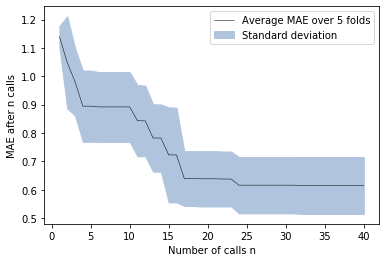

In [39]:
def plot_convergence(dataframe, n_calls):

    # x values
    x = list(range(1, n_calls + 1))
    
    # y values
    cumltv_MAE = [dataframe.loc[dataframe['Fold'] == fold, 'MAE/MAD'].tolist()
                   for fold in range(1, 6)]
    cumltv_MAE = list(zip(*cumltv_MAE))   
    y = [statistics.mean(call) for call in cumltv_MAE]
    
    # standard devation
    stdev = [statistics.stdev(call) for call in cumltv_MAE]
    
    # standard devation bounds
    y1 = [i - sd for i, sd in zip(y, stdev)]
    y2 = [i + sd for i, sd in zip(y, stdev)]
    
    # plot mean line
    line = plt.plot(x, 
             y, 
             color='black', 
             linewidth=0.5, 
                    label='Average MAE over 5 folds')
    
    # plot standard deviation bounds
    fill = plt.fill_between(x, 
                     y1, 
                     y2, 
                     fc='lightsteelblue', 
                            ec='lightsteelblue', 
                            label='Standard deviation')
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')

    plt.legend()


plot_convergence(cumulative_MAE_df, 40)

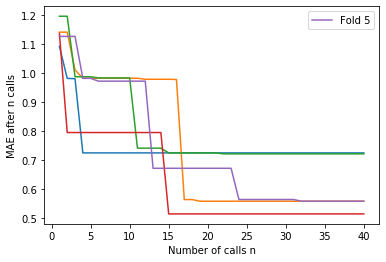

In [40]:
def plot_individual_convergence(dataframe, fold, n_calls):

    x = list(range(1, n_calls + 1))
    y = dataframe.loc[dataframe['Fold'] == fold]
    y = y['MAE/MAD'].tolist()

    line = plt.plot(x, y, label='Fold {}'.format(fold))
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')
    
    plt.legend(handles=line)


num_folds = range(1, 6)  # 5 folds
for fold in num_folds:
    plot_individual_convergence(cumulative_MAE_df, fold, 40)

## External testing

### Per SVR model

In [41]:
def svr_predict(model_num, test_set):

    with open(output_dr + '/fold_' + str(model_num) + '_SVM_model.svm', 'rb') as file:
        model = pickle.load(file)
    
    return model.predict(test_set)


def calc_mae(dataframe, model):

    model_df = dataframe.loc[dataframe['Model number'] == model]
    abs_err = model_df['Absolute error (kcal/mol)'].tolist()
    MAE = statistics.mean(abs_err)
    
    return MAE


# load in testing set
# note: test_df defined previously in section 5.3
test_ID = test_df.index
test_X = test_df.drop(columns='dGoffset (kcal/mol)').values
test_y = test_df['dGoffset (kcal/mol)'].values

# empty df for external testing results
test_rst = pd.DataFrame()

# peform prediction using each model
num_models = num_folds

for model in num_models:
    
    # call SVR prediction function
    svr_rst = svr_predict(model, test_X)
    
    # write results per fold into dictionary and load into df
    model_rst = {}
    model_rst['ID'] = test_ID
    model_rst['Model number'] = [model for i in range(41)]
    model_rst['Experimental dGoffset (kcal/mol)'] = test_y
    model_rst['Predcted dGoffset (kcal/mol)'] = svr_rst
    model_rst['Absolute error (kcal/mol)'] = abs(test_y - svr_rst)

    test_rst = pd.concat([test_rst, pd.DataFrame(model_rst)])


# calculate MAE values
MAE_lst = [calc_mae(test_rst, model) for model in num_models]
print('MAE values between experimental and predicted dGoffset values:\n')
for model, model_MAE in enumerate(MAE_lst):
    print('Model {} MAE: {} kcal/mol'.format(model + 1, round(model_MAE, 2)))
print('\nAverage MAE: {} kcal/mol'.format(round(statistics.mean(MAE_lst), 2)))


test_rst = test_rst.round(2)
test_rst

MAE values between experimental and predicted dGoffset values:

Model 1 MAE: 0.74 kcal/mol
Model 2 MAE: 0.73 kcal/mol
Model 3 MAE: 0.74 kcal/mol
Model 4 MAE: 0.68 kcal/mol
Model 5 MAE: 0.7 kcal/mol

Average MAE: 0.72 kcal/mol


,ID,Model number,Experimental dGoffset (kcal/mol),Predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_2972345,1,0.52,1.20,0.68
1,mobley_5282042,1,0.08,2.08,2.00
2,mobley_6935906,1,0.47,1.89,1.42
3,mobley_4479135,1,0.31,0.79,0.48
4,mobley_9897248,1,2.18,1.66,0.52
...,...,...,...,...,...
36,mobley_7913234,5,1.84,1.77,0.07
37,mobley_3211679,5,1.04,0.67,0.37
38,mobley_9653690,5,1.18,2.02,0.84
39,mobley_2316618,5,0.61,2.42,1.81


### Averaged over all models

In [42]:
# average predicted offset values
prdt_offsets = [test_rst.loc[test_rst['Model number'] == model, 'Predcted dGoffset (kcal/mol)'].tolist()
                   for model in num_models]
prdt_offsets = list(zip(*prdt_offsets))
avg_offsets = [statistics.mean(offset_set) for offset_set in prdt_offsets]

# write results to df
avg_rst = {}

avg_rst['ID'] = test_ID
avg_rst['Experimental dGoffset (kcal/mol)'] = test_y
avg_rst['Averaged predcted dGoffset (kcal/mol)'] = avg_offsets
avg_rst['Absolute error (kcal/mol)'] = abs(test_y - avg_offsets)

avg_rst_df = pd.DataFrame(avg_rst)

# MAE
print('MAE between experimental and averaged predicted dGoffsets:')
print('MAE: {} kcal/mol'.format(round(statistics.mean(abs(test_y - avg_offsets)), 2)))

avg_rst_df = avg_rst_df.round(2)
avg_rst_df

MAE between experimental and averaged predicted dGoffsets:
MAE: 0.7 kcal/mol


,ID,Experimental dGoffset (kcal/mol),Averaged predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_2972345,0.52,1.11,0.59
1,mobley_5282042,0.08,2.07,1.99
2,mobley_6935906,0.47,1.87,1.40
3,mobley_4479135,0.31,0.95,0.64
4,mobley_9897248,2.18,1.74,0.44
5,mobley_819018,1.93,1.73,0.20
6,mobley_2636578,0.52,0.62,0.10
7,mobley_7676709,0.68,0.87,0.19
8,mobley_3040612,0.09,0.38,0.29
9,mobley_8337722,0.15,1.42,1.27


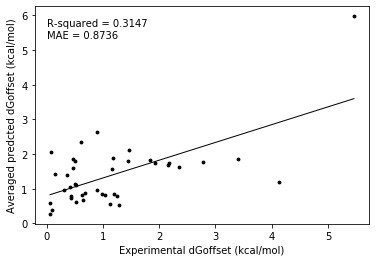

In [43]:
plot_scatter(avg_rst_df, 
        [1, 'Experimental dGoffset (kcal/mol)'], 
        [2, 'Averaged predcted dGoffset (kcal/mol)'])

## Corrected hydration free energies

In [44]:
# SAMPL4 Gurthrie df
test_fs_df = freesolv_df.loc[freesolv_df.iloc[:, 7] == 'SAMPL4_Guthrie']

# experimental dGhydr
test_exp = test_fs_df.iloc[:, 3]

# calculated dGhydr
test_calc = test_fs_df.iloc[:, 5].tolist()

# corrected calculated Ghydr using predicted dGoffsets
corr_calc = [calc - err for calc, err in zip(test_calc, avg_offsets)]

# calculated dGhydr absolute error
calc_AE = [abs(exp - calc) for exp, calc in zip(test_exp, test_calc)]

# corrected calculated dGhydr absolute error
corr_AE = [abs(exp - calc) for exp, calc in zip(test_exp, corr_calc)]

# create df
corr_dict = {'ID': test_ID, 
             'Experimental dGhydr (kcal/mol)': test_exp, 
             'Calculated dGhydr (kcal/mol)': test_calc, 
             'Calculated dGhydr absolute error (kcal/mol)': calc_AE,  
             'Corrected calculated dGhydr (kcal/mol)': corr_calc, 
             'Corrected calculated dGhydr absolute error (kcal/mol)': corr_AE}

corr_df = pd.DataFrame(corr_dict).round(2)

# calculate MAEs
calc_MAE = statistics.mean(calc_AE)
print('Mobley calculated MAE: {} kcal/mol'.format(round(calc_MAE, 2)))
corr_MAE = statistics.mean(corr_AE)
print('Corrected calculated MAE: {} kcal/mol'.format(round(corr_MAE, 2)))

corr_df

Mobley calculated MAE: 1.17 kcal/mol
Corrected calculated MAE: 1.71 kcal/mol


,ID,Experimental dGhydr (kcal/mol),Calculated dGhydr (kcal/mol),Calculated dGhydr absolute error (kcal/mol),Corrected calculated dGhydr (kcal/mol),Corrected calculated dGhydr absolute error (kcal/mol)
10,mobley_2972345,-3.75,-3.34,0.41,-4.45,0.70
79,mobley_5282042,-9.34,-7.87,1.47,-9.94,0.60
98,mobley_6935906,-5.66,-4.77,0.89,-6.64,0.98
113,mobley_4479135,-14.21,-13.60,0.61,-14.55,0.34
123,mobley_9897248,-11.85,-15.25,3.40,-16.99,5.14
140,mobley_819018,-5.33,-4.05,1.28,-5.78,0.45
141,mobley_2636578,-4.80,-5.32,0.52,-5.94,1.14
162,mobley_7676709,-4.68,-8.81,4.13,-9.68,5.00
173,mobley_3040612,-3.78,-4.30,0.52,-4.68,0.90
180,mobley_8337722,-0.85,-0.76,0.09,-2.18,1.33


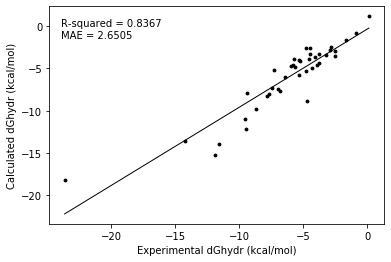

In [45]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [2, 'Calculated dGhydr (kcal/mol)'])

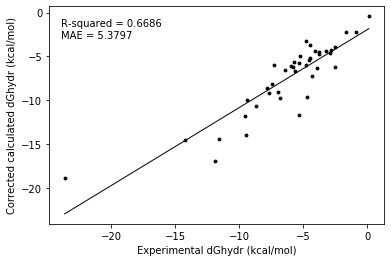

In [46]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [4, 'Corrected calculated dGhydr (kcal/mol)'])

## Determining high absolute errors

In [47]:
def draw_structure_panel(sdf_suppl, legend):
    'Draw RDKit.Draw in panel format.'

    suppl = [SDMolSupplier(sdf) for sdf in sdf_suppl]
    mols = [x[0] for x in suppl if x is not None]
    for mol in mols:
        tmp = AllChem.Compute2DCoords(mol)
    
    return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=legend)    

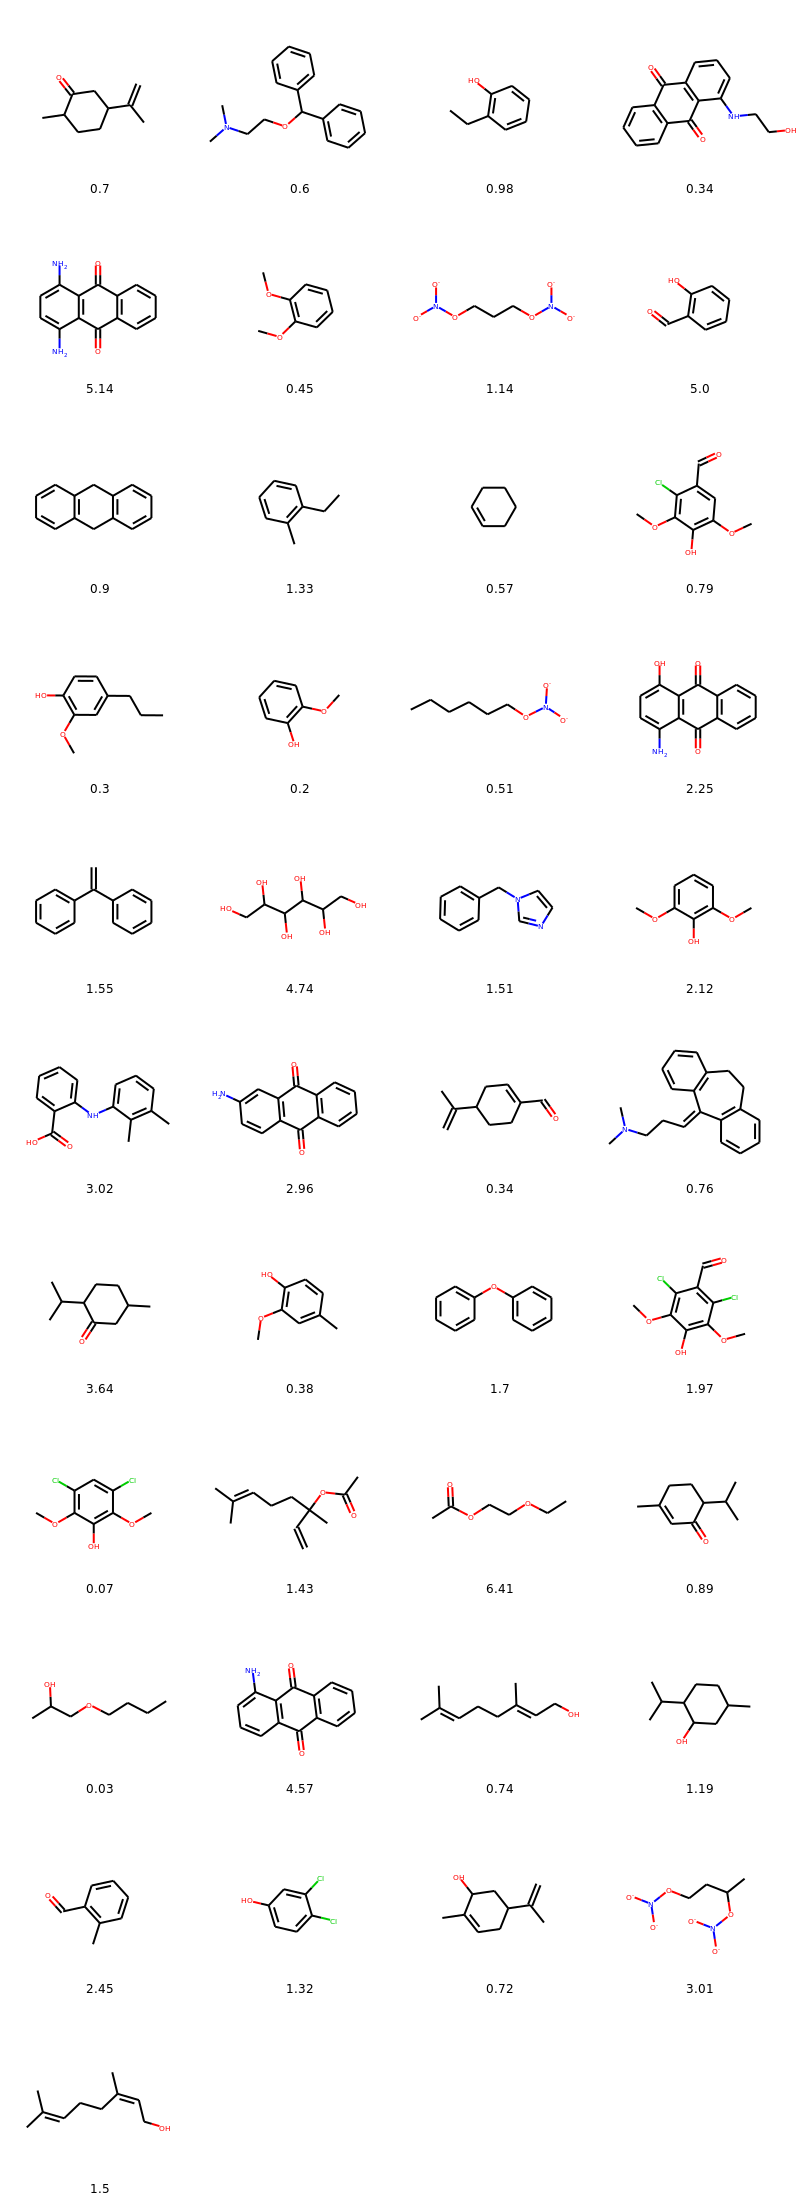

In [48]:
# list of test SDF paths from section 5.3.2
new_test_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf
               for sdf in test_sdf]

corr_AE = corr_df.iloc[:, 5].tolist()
corr_AE = [str(x) for x in corr_AE]

draw_structure_panel(new_test_sdf, corr_AE)

### Absolute error < 1.00

19 structures have dGhydr absolute erros < 1.00 kcal/mol


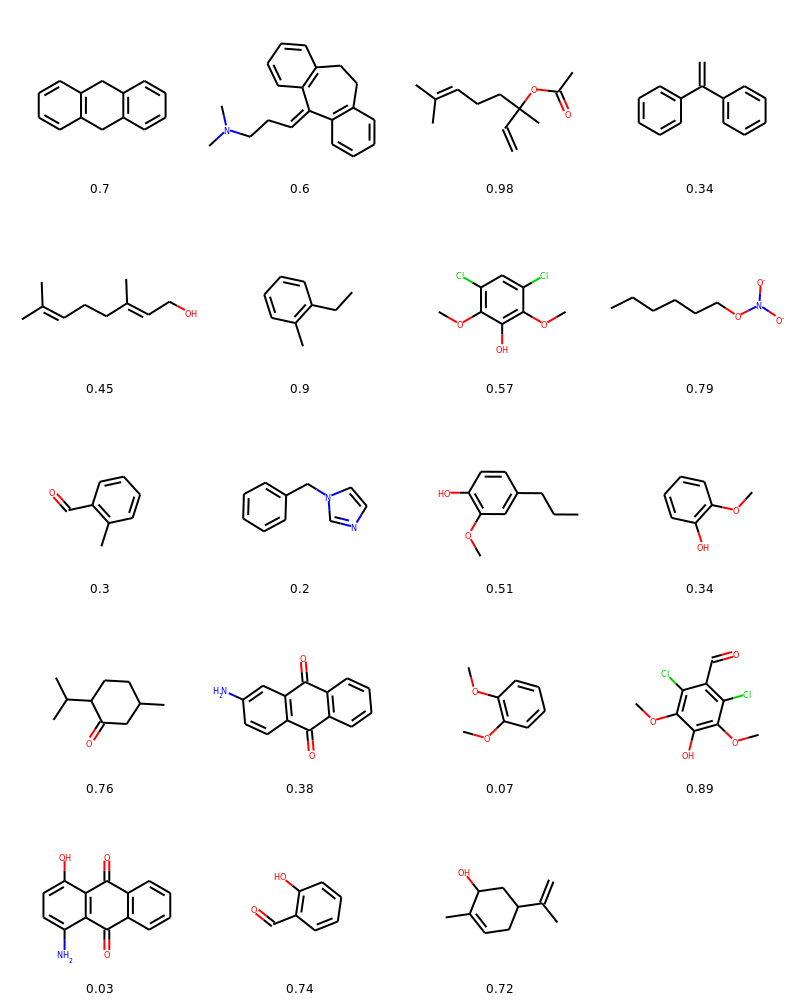

In [49]:
# df containing entries with corrected calculated dGhydr absolute errors < 1.00
below_one_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 1.00]

# sdf paths
below_one_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in below_one_df['ID']]

# Actual absolute error values
below_one_AE = [str(x) for x in below_one_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(below_one_df), 'structures have dGhydr absolute erros < 1.00 kcal/mol')
draw_structure_panel(below_one_sdf, below_one_AE)

### 1.00 < absolute error < 2.00

10 structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol


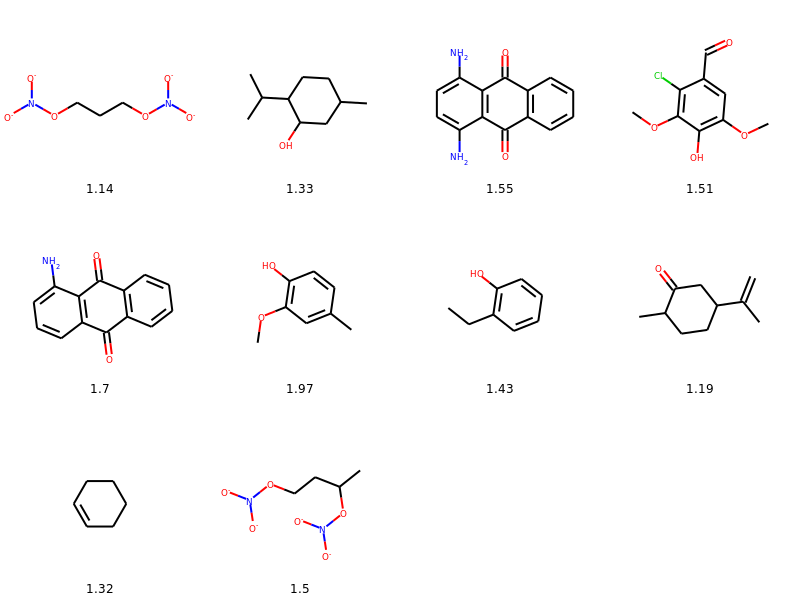

In [50]:
# df containing entries with corrected calculated dGhydr 1.00 < absolute errors < 2.00
between_1and2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 2.00]
between_1and2_df = between_1and2_df.loc[between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 1.00]

# sdf paths
between_1and2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in between_1and2_df['ID']]

# Actual absolute error values
between_1and2_AE = [str(x) for x in between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(between_1and2_df), 'structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol')
draw_structure_panel(between_1and2_sdf, between_1and2_AE)

### Absolute error > 2.00

12 structures have dGhydr absolute erros > 2.00 kcal/mol


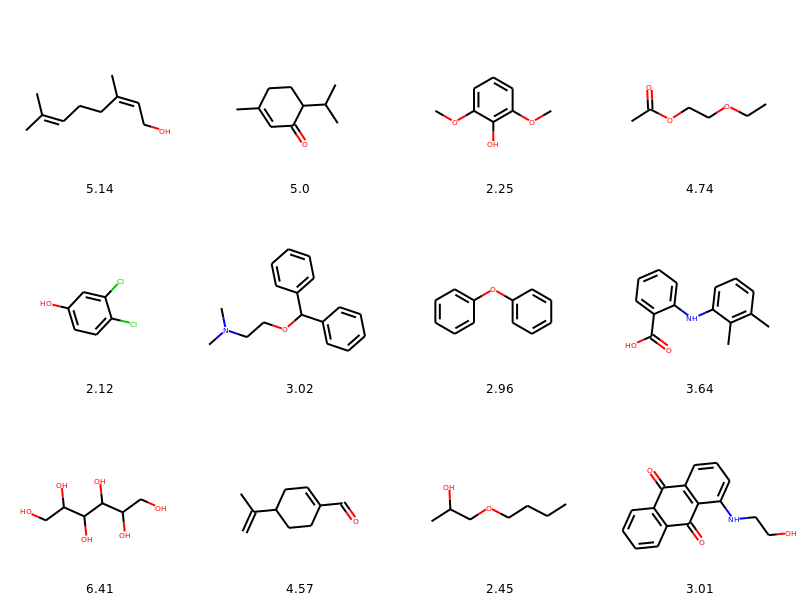

In [51]:
# df containing entries with corrected calculated dGhydr absolute errors > 2.00
above_2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 2.00]

# sdf paths
above_2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in above_2_df['ID']]

# Actual absolute error values
above_2_AE = [str(x) for x in above_2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(above_2_df), 'structures have dGhydr absolute erros > 2.00 kcal/mol')
draw_structure_panel(above_2_sdf, above_2_AE)